In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
articles = pd.read_csv('../data/articles.csv')
customers = pd.read_csv('../data/customers.csv')
# sample_submisison = pd.read_csv('../data/sample_submission.csv')
# transactions = pd.read_csv('../data/temp.csv')

In [9]:
print(articles.columns)
for col in articles.columns:
    print(col)
    print(articles[col].describe())
    print(articles[col].isna().sum())
    print(len(articles[col].unique()) == len(articles[col].tolist()))

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')
article_id
count    1.055420e+05
mean     6.984246e+08
std      1.284624e+08
min      1.087750e+08
25%      6.169925e+08
50%      7.022130e+08
75%      7.967030e+08
max      9.594610e+08
Name: article_id, dtype: float64
0
True
product_code
count    105542.000000
mean     698424.563378
std      128462.384432
min      108775.000000
25%      616992.500000
50%      702213.000000
75%      796703.000000
max   

In [25]:
# figure out whether the pairs are uniuqe for the values
print(articles[['perceived_colour_value_id', 'perceived_colour_value_name']])
df = articles[['perceived_colour_value_id', 'perceived_colour_value_name']]
df.drop_duplicates()

        perceived_colour_value_id perceived_colour_value_name
0                               4                        Dark
1                               3                       Light
2                               1                 Dusty Light
3                               4                        Dark
4                               3                       Light
...                           ...                         ...
105537                          4                        Dark
105538                          4                        Dark
105539                          4                        Dark
105540                          4                        Dark
105541                          1                 Dusty Light

[105542 rows x 2 columns]


,perceived_colour_value_id,perceived_colour_value_name
0,4,Dark
1,3,Light
2,1,Dusty Light
7,2,Medium Dusty
32,5,Bright
60,7,Medium
257,6,Undefined
21238,-1,Unknown


In [26]:
# figure out whether the pairs are unique for the values
print(articles[['perceived_colour_master_id', 'perceived_colour_master_name']])
df = articles[['perceived_colour_master_id', 'perceived_colour_master_name']]
df.drop_duplicates()

        perceived_colour_master_id perceived_colour_master_name
0                                5                        Black
1                                9                        White
2                                9                        White
3                                5                        Black
4                                9                        White
...                            ...                          ...
105537                           5                        Black
105538                           5                        Black
105539                           5                        Black
105540                           5                        Black
105541                           9                        White

[105542 rows x 2 columns]


,perceived_colour_master_id,perceived_colour_master_name
0,5,Black
1,9,White
5,11,Beige
11,12,Grey
12,2,Blue
20,4,Pink
22,6,Lilac Purple
25,18,Red
29,1,Mole
30,3,Orange


In [29]:
print(articles['perceived_colour_value_name'].unique())
print(articles['perceived_colour_master_name'].unique())

['Dark' 'Light' 'Dusty Light' 'Medium Dusty' 'Bright' 'Medium' 'Undefined'
 'Unknown']
['Black' 'White' 'Beige' 'Grey' 'Blue' 'Pink' 'Lilac Purple' 'Red' 'Mole'
 'Orange' 'Metal' 'Brown' 'Turquoise' 'Yellow' 'Khaki green' 'Green'
 'undefined' 'Unknown' 'Yellowish Green' 'Bluish Green']


<AxesSubplot:xlabel='perceived_colour_value_name'>

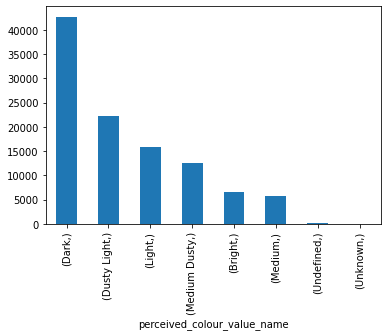

In [27]:
articles[['perceived_colour_value_name']].value_counts().plot.bar()

<AxesSubplot:xlabel='perceived_colour_master_name'>

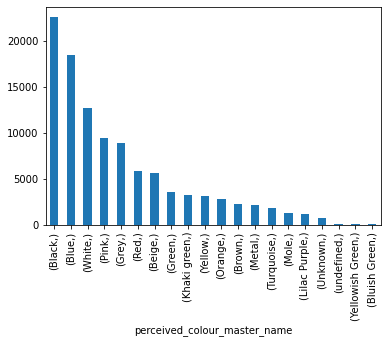

In [28]:
articles[['perceived_colour_master_name']].value_counts().plot.bar()

In [32]:
# The quest for mole
df = articles[['colour_group_name', 'perceived_colour_master_name']]
df = df.drop_duplicates()
df[df['perceived_colour_master_name'] == 'Mole']

,colour_group_name,perceived_colour_master_name
29,Greyish Beige,Mole
234,Beige,Mole
275,Dark Beige,Mole
421,Pink,Mole
3281,Greenish Khaki,Mole
3585,Light Grey,Mole
4387,Light Beige,Mole
6163,Yellowish Brown,Mole
9798,Dark Pink,Mole
21567,Grey,Mole


In [33]:
# metal colour
df = articles[['colour_group_name', 'perceived_colour_master_name']]
df = df.drop_duplicates()
df[df['perceived_colour_master_name'] == 'Metal']

,colour_group_name,perceived_colour_master_name
31,Silver,Metal
32,Gold,Metal
1685,Bronze/Copper,Metal


In [35]:
# unknown v undefined
df = articles[['perceived_colour_value_name', 'article_id']]
unknown_df = df[df['perceived_colour_value_name'] == 'Unknown']
undefined_df = df[df['perceived_colour_value_name'] == 'Undefined']
print(unknown_df['article_id'].tolist())
print(undefined_df['article_id'].tolist())

[592986010, 662344003, 665665001, 694968001, 694968004, 696114001, 696114002, 696124001, 696124002, 696500001, 696508002, 696512002, 711483004, 713577001, 719216001, 719216002, 719243001, 719243002, 719244001, 719244003, 719250001, 719250002, 719258001, 719259001, 721472001, 727667002, 730292001, 743295001]
[212042036, 299733008, 373506027, 411413008, 442992005, 478426002, 478426004, 487050005, 515459004, 520175013, 522398055, 522398056, 533399001, 535716001, 540555001, 545589001, 546788001, 546967001, 547104005, 548563001, 553536001, 553881032, 554208003, 554823006, 561796002, 567291001, 567813002, 567968001, 567968002, 567968003, 568060004, 570968002, 571765001, 573085029, 575542004, 575542005, 582535001, 583539001, 584928001, 584989001, 586892003, 588184003, 590080001, 591087002, 596329007, 597569002, 598344002, 598807002, 606125001, 608071001, 608334001, 608776011, 609256001, 610927001, 611644001, 615178007, 616129002, 623278001, 623865001, 624679001, 629656001, 635068001, 63719400